In [1]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from IPython.display import display 

In [12]:
# Load the rrhh cdv dataset from seaborn
rrhh_df = pd.read_csv('rrhh.csv')


cat_val = [rrhh_df.Departamento.unique(),
rrhh_df.Posicion.unique(),
rrhh_df.Desempeño.unique(),
rrhh_df.Sexo.unique()]

[display(data) for data in cat_val]
# # convert Estado civil del trabajador (1: divorciado, 2: casado,3:separado, 4: soltero, 5: viuda)
rrhh_df['Estado.Civil'] = rrhh_df['Estado.Civil'].map({1: 'divorciado', 2: 'casado', 3: 'separado', 4: 'soltero', 5: 'viuda'})

## convert Estado (1: desvinculado, 0:vinculado).
rrhh_df['Estado'] = rrhh_df['Estado'].map({1: 'desvinculado', 0: 'vinculado'})


array(['Admin Offices', 'Executive Office', 'IT/IS', 'Production',
       'Sales', 'Software Engineering'], dtype=object)

array(['Accountant I', 'Administrative Assistant',
       'Shared Services Manager', 'Sr. Accountant', 'President & CEO',
       'CIO', 'Database Administrator', 'IT Director', 'IT Manager - DB',
       'IT Manager - Infra', 'IT Manager - Support', 'IT Support',
       'Network Engineer', 'Sr. DBA', 'Sr. Network Engineer',
       'Director of Operations', 'Production Manager',
       'Production Technician I', 'Production Technician II',
       'Area Sales Manager', 'Director of Sales', 'Sales Manager',
       'Software Engineer', 'Software Engineering Manager', 'BI Director',
       'Senior BI Developer', 'BI Developer', 'Data Architect'],
      dtype=object)

array(['Fully Meets', 'N/A- too early to review', '90-day meets',
       'Exceptional', 'Needs Improvement', 'Exceeds', 'PIP'], dtype=object)

array(['Female', 'Male'], dtype=object)

Estado        Sexo  
desvinculado  Female     76
              Male       51
vinculado     Female    101
              Male       82
Name: count, dtype: int64
Estado        Estado.Civil
desvinculado  casado          58
              soltero         45
              divorciado      16
              separado         4
              viuda            4
vinculado     soltero         92
              casado          65
              divorciado      14
              separado         8
              viuda            4
Name: count, dtype: int64
Estado        Departamento        
desvinculado  Production              102
              IT/IS                    15
              Sales                     5
              Software Engineering      3
              Admin Offices             2
vinculado     Production              106
              IT/IS                    35
              Sales                    26
              Admin Offices             8
              Software Engineering      7
   

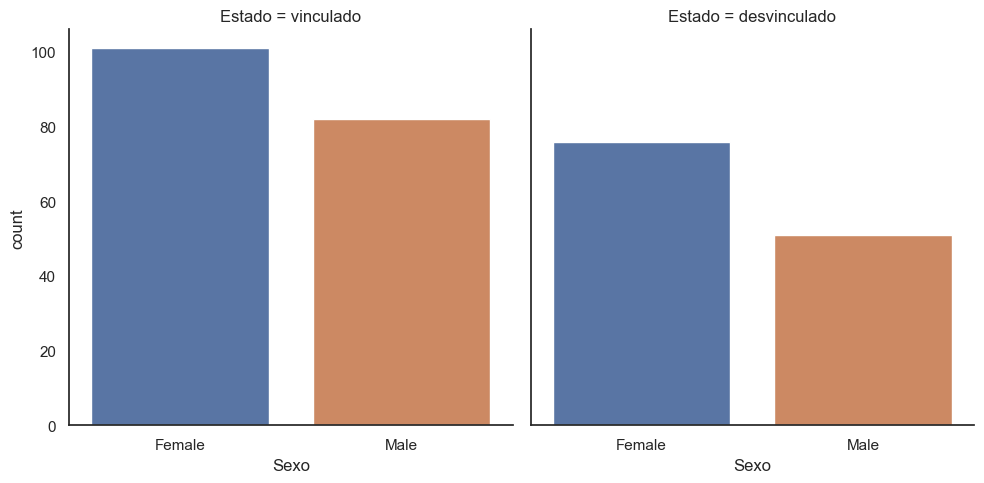

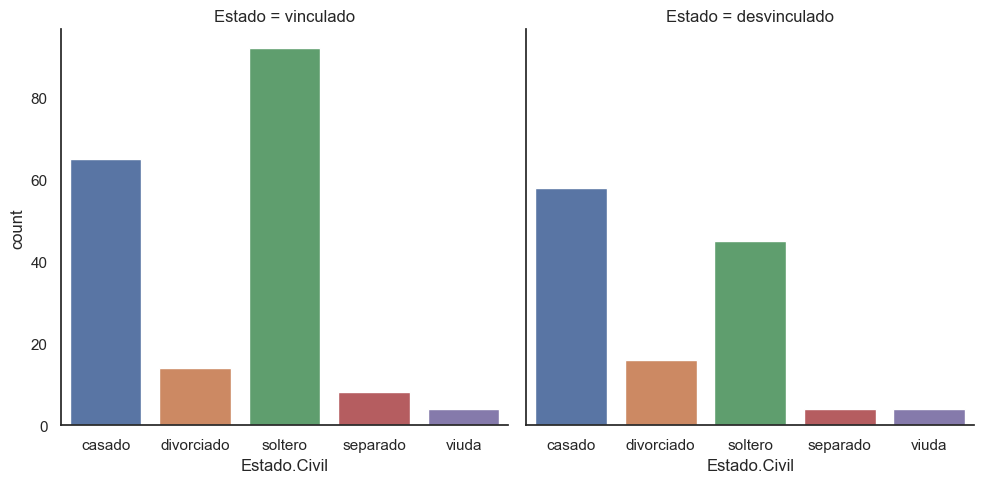

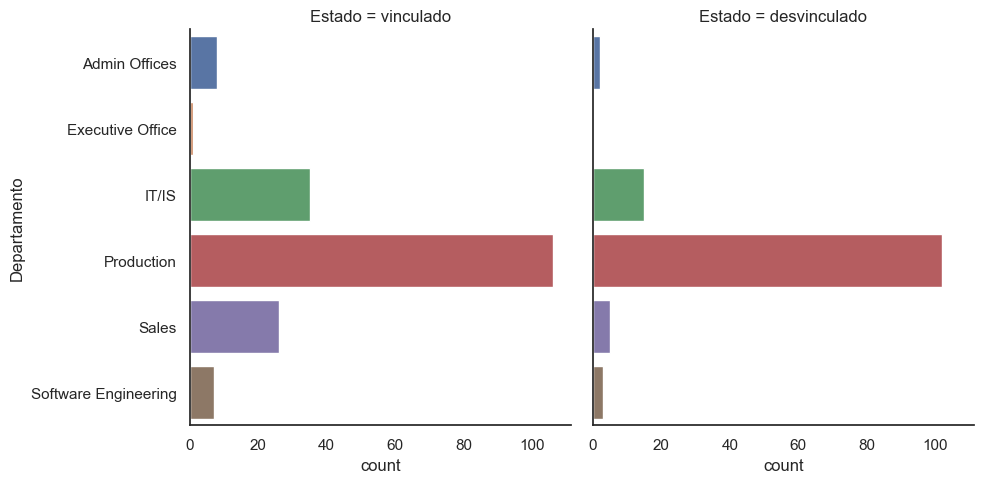

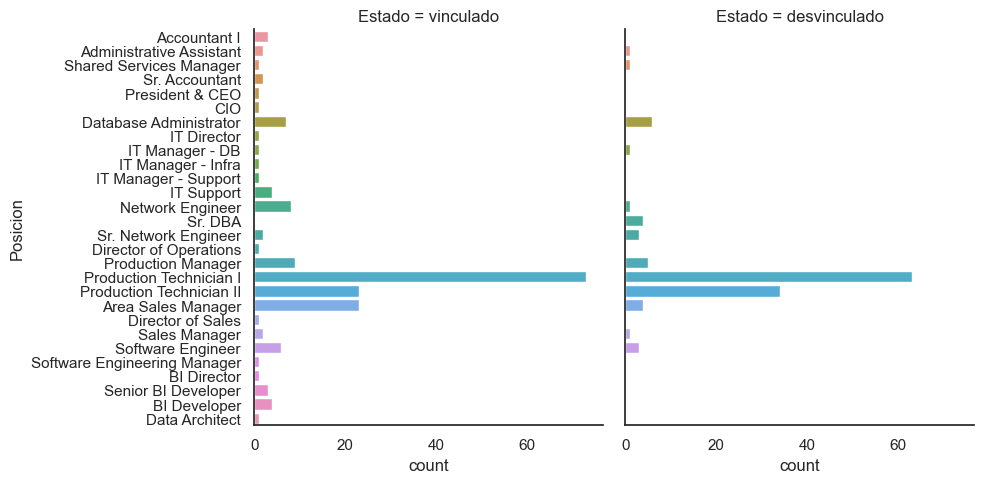

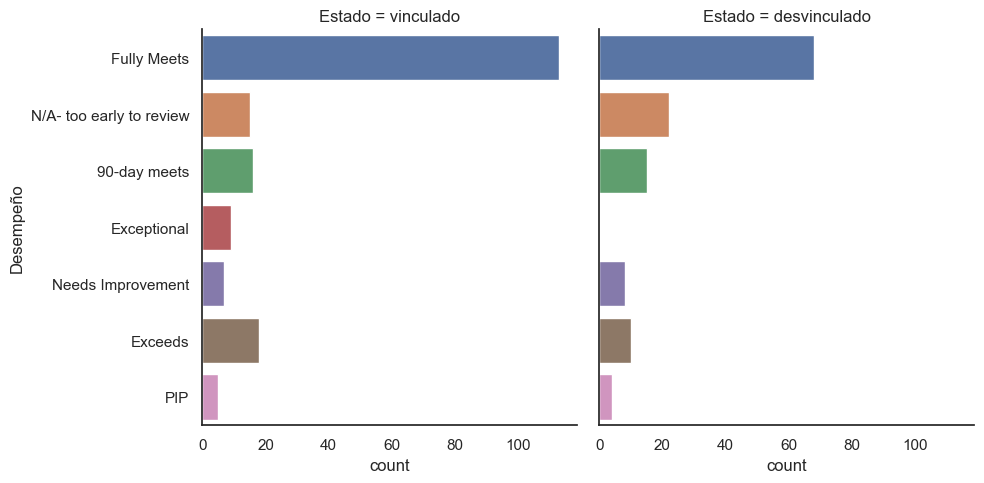

In [15]:

# Generate summary statistics for categorical variables
print(rrhh_df.groupby('Estado')['Sexo'].value_counts())
print(rrhh_df.groupby('Estado')['Estado.Civil'].value_counts())
print(rrhh_df.groupby('Estado')['Departamento'].value_counts())
print(rrhh_df.groupby('Estado')['Posicion'].value_counts())
print(rrhh_df.groupby('Estado')['Desempeño'].value_counts())

# Create bar plots to visualize the relationship between categorical variables and the variable of interest
sns.catplot(data=rrhh_df, x='Sexo', col='Estado', kind='count')
sns.catplot(data=rrhh_df, x='Estado.Civil', col='Estado', kind='count')
sns.catplot(data=rrhh_df, y='Departamento', col='Estado', kind='count')
sns.catplot(data=rrhh_df, y='Posicion', col='Estado', kind='count')
sns.catplot(data=rrhh_df, y='Desempeño', col='Estado', kind='count')

plt.show()

In [3]:
rrhh_df.describe()

,Edad,Ratio.Pago,Salario,Dias.trabajados,Ausencias
count,310.000000,310.000000,310.000000,310.000000,310.000000
mean,38.867742,31.284806,4606.534839,1296.080645,10.264516
std,8.922459,15.383615,1677.350176,769.491382,5.843235
min,25.000000,14.000000,3004.600000,2.000000,1.000000
25%,32.000000,20.000000,3707.033333,766.250000,5.000000
50%,37.000000,24.000000,4190.666667,1238.000000,10.000000
75%,44.000000,45.315000,4804.733333,1732.750000,15.000000
max,67.000000,80.000000,16666.666667,4339.000000,20.000000


In [4]:
rrhh_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Estado           310 non-null    object 
 1   Edad             310 non-null    float64
 2   Ratio.Pago       310 non-null    float64
 3   Salario          310 non-null    float64
 4   Dias.trabajados  310 non-null    int64  
 5   Ausencias        310 non-null    int64  
 6   Sexo             310 non-null    object 
 7   Estado.Civil     310 non-null    object 
 8   Departamento     310 non-null    object 
 9   Posicion         310 non-null    object 
 10  Desempeño        310 non-null    object 
dtypes: float64(3), int64(2), object(6)
memory usage: 26.8+ KB


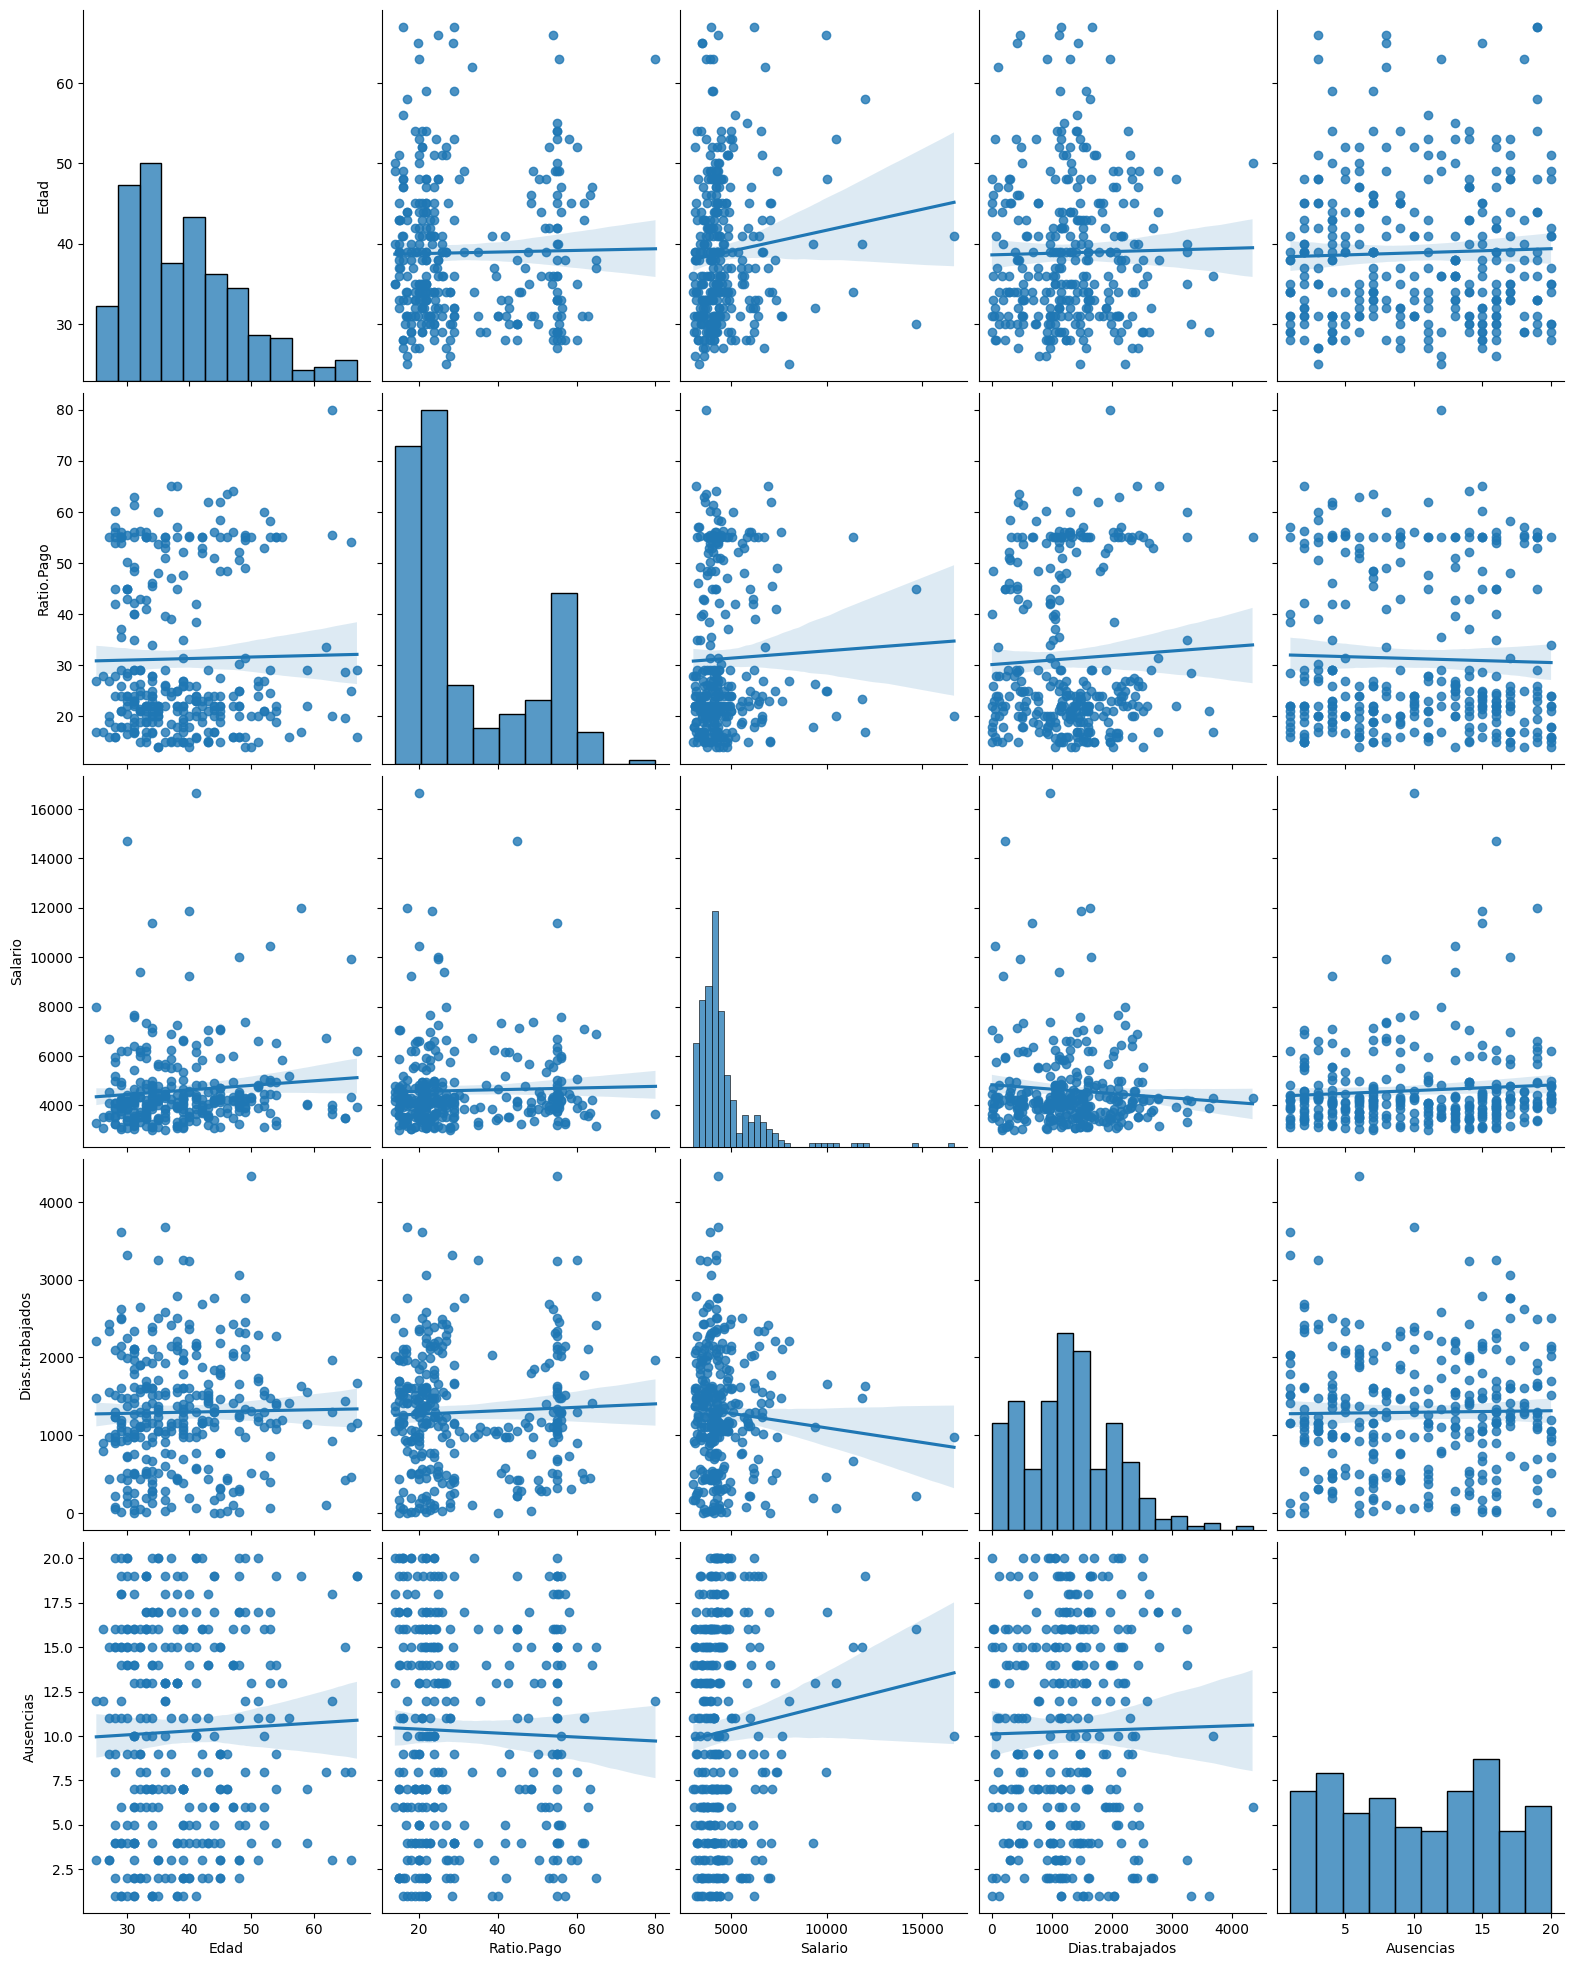

In [5]:
# histograms for all variables
sns.pairplot(rrhh_df, height=4, aspect=.8, kind="reg")

<Axes: >

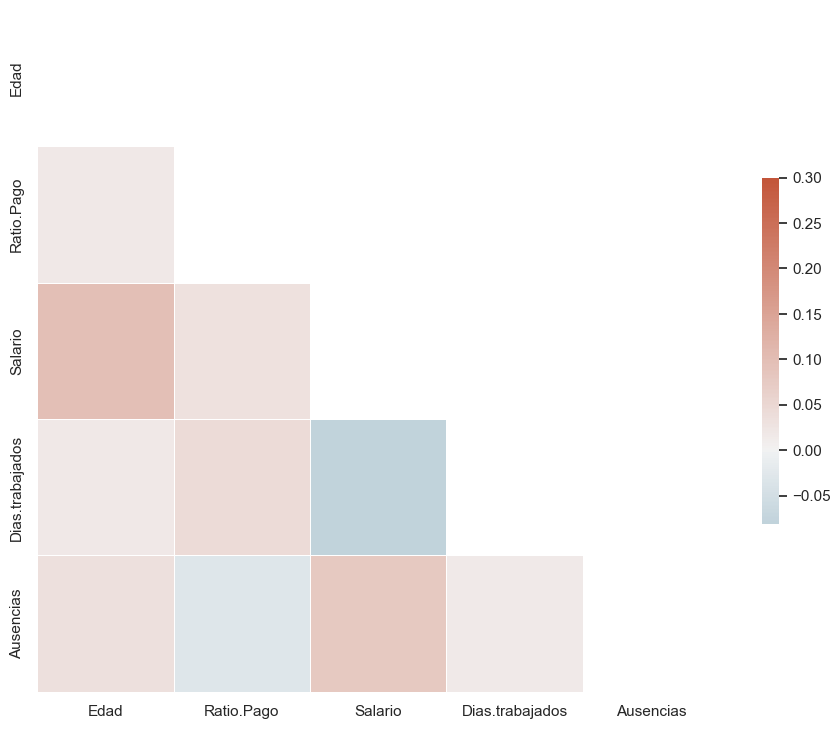

In [6]:

import numpy as np
# correlation matrix
sns.set_theme(style="white")


# Compute the correlation matrix only with numeric variables
corr = rrhh_df.select_dtypes(include=np.number).corr()


# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [7]:
# convert categorical variables to dummy variables
rrhh_df = pd.get_dummies(rrhh_df, columns=['Departamento', 'Posicion', 'Desempeño', 'Sexo', 'Estado.Civil', 'Estado'], drop_first=True)


In [8]:
rrhh_df

,Edad,Ratio.Pago,Salario,Dias.trabajados,Ausencias,Departamento_Executive Office,Departamento_IT/IS,Departamento_Production,Departamento_Sales,Departamento_Software Engineering,...,Desempeño_Fully Meets,Desempeño_N/A- too early to review,Desempeño_Needs Improvement,Desempeño_PIP,Sexo_Male,Estado.Civil_divorciado,Estado.Civil_separado,Estado.Civil_soltero,Estado.Civil_viuda,Estado_vinculado
0,30.0,28.50,4167.066667,3317,1,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True
1,34.0,23.00,6962.466667,1420,17,False,False,False,False,False,...,True,False,False,False,True,True,False,False,False,True
2,31.0,29.00,4330.333333,1154,3,False,False,False,False,False,...,True,False,False,False,True,False,False,True,False,True
3,32.0,21.50,4332.733333,58,15,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
4,30.0,16.56,3388.333333,940,2,False,False,False,False,False,...,False,True,False,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,48.0,52.25,4029.733333,289,14,False,True,False,False,False,...,True,False,False,False,True,False,False,True,False,True
306,36.0,51.00,4392.866667,284,13,False,True,False,False,False,...,True,False,False,False,True,False,False,True,False,True
307,34.0,46.00,3234.200000,284,4,False,True,False,False,False,...,True,False,False,False,True,False,False,True,False,True
308,30.0,45.00,14696.666667,220,16,False,True,False,False,False,...,True,False,False,False,True,False,False,False,False,True


In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    rrhh_df.drop('Estado_vinculado', axis=1),
    rrhh_df['Estado_vinculado'],
    test_size=0.2, random_state=0
)
# Create the logistic regression model
model = LogisticRegression(max_iter=1000)

# Train the model
model.fit(X_train, y_train)
# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8064516129032258


<Axes: >

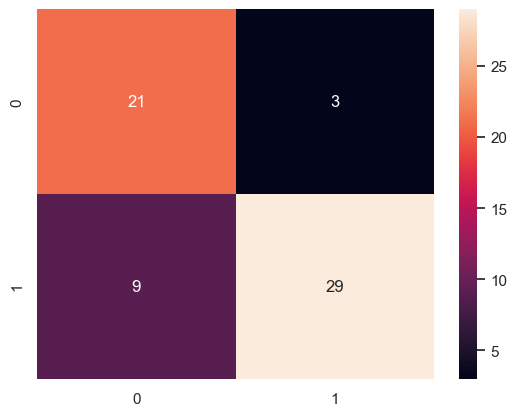

In [16]:
from sklearn.metrics import confusion_matrix


cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True)
